In [2]:
# -*- coding:utf-8 -*-
# 3）模型构建
# 目标：判断是否是洗浴事件，是则1，不是则0
# 建立、训练多层神经网络 并完成模型的检验
# 选取”候选洗浴事件“的11个属性作为网络的输入，分别为：洗浴时间点、总用水时长、总停顿时长、平均停顿时长、停顿次数、
# 用水时长、用水时长/总用水时长、总用水量、平均水流量、水流量波动和停顿时长波动
from __future__ import print_function
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# 由于此单元的中间数据处理原书中有问题，所以此处采用书中给的训练数据，和测试数据，旨在测试模型在此数据上的运行
inputfile1 = 'train_neural_network_data.xls' # 训练数据
inputfile2 = 'test_neural_network_data.xls' # 测试数据
testoutputfile = 'test_output_data.xls' #测试数据模型输出文件

data_train = pd.read_excel(inputfile1) # 读入训练数据
data_test = pd.read_excel(inputfile2) # 读入测试数据

data_train.head()

,热水事件,起始数据编号,终止数据编号,开始时间（begin_time）,根据日志判断是否为洗浴（1表示是，0表示否）,洗浴时间点,总用水时长（w_time）,总停顿时长（w_pause_time）,平均停顿时长（avg_pause_time）,停顿次数（pause）,用水时长（use_water_time）,用水/总时长（use_water_rate）,总用水量（w_water）,平均水流量（water_rate）,水流量波动（flow_volatility）,停顿时长波动（pause_volatility）
0,1,218,344,2014-10-19 08:51:30',0,8,591.999998,303.500013,50.583336,6,288.499985,0.487331,12.998333,2.703293,0.870856,650.106848
1,2,569,965,2014-10-19 15:55:23',1,15,1008.000005,46.499999,46.499999,1,961.500006,0.953869,50.626667,3.159230,0.202300,0.000000
2,3,1077,1128,2014-10-19 18:21:40',0,18,467.999997,269.499987,53.899997,5,198.500010,0.424145,7.087500,2.142317,0.404960,531.384976
3,4,1973,2236,2014-10-20 16:42:41',1,16,660.999996,23.499993,23.499993,1,637.500003,0.964448,32.193333,3.029961,0.291306,0.000000
4,5,2320,2435,2014-10-20 18:05:28',1,18,550.000005,164.500013,32.900003,5,385.499992,0.700909,13.459167,2.094812,0.395200,180.384977


In [3]:
x_train = data_train.iloc[:,5:17].as_matrix() # 训练样本特征
y_train = data_train.iloc[:,4].as_matrix() # 训练样本标签列
x_test = data_test.iloc[:,5:17].as_matrix() # 测试样本特征
y_test = data_test.iloc[:,4].as_matrix() # 训练样本标签列

In [4]:

# 训练神经网络时，对神经网络的参数进行寻优，发现含两个隐含层的神经网络训练效果较好
# 其中两个隐层的节点数分别为17和10时训练效果较好

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

netfile = 'net.model'# 构建的神经网络模型存储路径

model = Sequential() # 建立模型
model.add(Dense(units=17, input_dim=11)) # 添加输入层、隐藏层的连接
model.add(Activation('relu')) # 以relu函数为激活函数
model.add(Dense(units=10, input_dim=17)) # 添加隐藏层、二层隐藏层的连接
model.add(Activation('relu')) # 以relu函数为激活函数
model.add(Dense(units=1, input_dim=10)) # 添加二层隐藏层、输出层的连接
model.add(Activation('sigmoid')) # 以sigmoid函数为激活函数

# 编译模型，损失函数为binary_crossentropy,用adam法求解
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
model.fit(x_train, y_train, nb_epoch = 1000, batch_size = 1)
model.save_weights(netfile)# 保存模型参数




Using Theano backend.
D:\Anaconda2\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 2/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 3/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 4/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 5/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 6/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 7/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 8/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 9/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 10/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 11/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 12/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 13/1000
28/28 [==================

28/28 [==============================] - 0s - loss: 3.4162         
Epoch 102/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 103/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 104/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 105/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 106/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 107/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 108/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 109/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 110/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 111/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 112/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 113/1000
28/28 [=======

28/28 [==============================] - 0s - loss: 3.4162         
Epoch 201/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 202/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 203/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 204/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 205/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 206/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 207/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 208/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 209/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 210/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 211/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 212/1000
28/28 [======

28/28 [==============================] - ETA: 0s - loss: 3.5428 - 0s - loss: 3.4162     
Epoch 300/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 301/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 302/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 303/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 304/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 305/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 306/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 307/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 308/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 309/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 310/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epo

28/28 [==============================] - 0s - loss: 3.4162      
Epoch 399/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 400/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 401/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 402/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 403/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 404/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 405/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 406/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 407/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 408/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 409/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 410/1000
28/28 [=

28/28 [==============================] - 0s - loss: 3.4162         
Epoch 498/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 499/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 500/1000
28/28 [==============================] - ETA: 0s - loss: 1.1921e-0 - 0s - loss: 3.4162         
Epoch 501/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 502/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 503/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 504/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 505/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 506/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 507/1000
28/28 [==============================] - 0s - loss: 3.4162     
Epoch 508/1000
28/28 [==============================] - 0s - loss: 3.4162         
E

28/28 [==============================] - 0s - loss: 3.4162         
Epoch 597/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 598/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 599/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 600/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 601/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 602/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 603/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 604/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 605/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 606/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 607/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 608/1000
28/28

28/28 [==============================] - 0s - loss: 3.4162      
Epoch 696/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 697/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 698/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 699/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 700/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 701/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 702/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 703/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 704/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 705/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 706/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 707/1000
28/28 [============

28/28 [==============================] - 0s - loss: 3.4162         
Epoch 794/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 795/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 796/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 797/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 798/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 799/1000
28/28 [==============================] - 0s - loss: 3.4162     
Epoch 800/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 801/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 802/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 803/1000
28/28 [==============================] - 0s - loss: 3.4162     
Epoch 804/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 805/1000
28/28 [===============

Epoch 893/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 894/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 895/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 896/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 897/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 898/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 899/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 900/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 901/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 902/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 903/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 904/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 905/1

28/28 [==============================] - 0s - loss: 3.4162        
Epoch 992/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 993/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 994/1000
28/28 [==============================] - 0s - loss: 3.4162     
Epoch 995/1000
28/28 [==============================] - 0s - loss: 3.4162     
Epoch 996/1000
28/28 [==============================] - 0s - loss: 3.4162      
Epoch 997/1000
28/28 [==============================] - 0s - loss: 3.4162         
Epoch 998/1000
28/28 [==============================] - 0s - loss: 3.4162        
Epoch 999/1000
28/28 [==============================] - 0s - loss: 3.4162     e-0 - ETA: 0s - loss: 3.5428   
Epoch 1000/1000
28/28 [==============================] - 0s - loss: 3.4162      


28/28 [==============================] - 0s


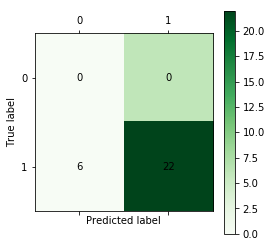

In [6]:
predict_result_train = model.predict_classes(x_train).reshape(len(data_train)) #给出预测类别（训练集）
from cm_plot import *
cm_plot(y_train, predict_result_train).show() #显示混淆矩阵可视化结果 看训练结果正确率


21/21 [==============================] - 0s


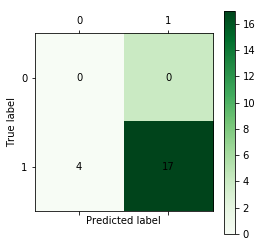

In [11]:
from sklearn.metrics import confusion_matrix
predict_result_test = model.predict_classes(x_test).reshape(len(data_test)) #给出预测类别（测试集）
from cm_plot import *
cm = confusion_matrix(y_test, predict_result_test)
cm_plot(y_test, predict_result_test).show() #显示混淆矩阵可视化结果 看训练结果正确率



In [13]:
from __future__ import division
correctRate = (cm[1,1] + cm[0,0]) / cm.sum()
correctRate

0.80952380952380953

In [14]:
r = DataFrame(predict_result_test, columns = [u'预测结果']) # 给出预测类别测试集
# predict_rate = DataFrame(model.predict(x_test), columns = [u'预测正确率']) # 给出预测类别测试集
res = pd.concat([data_test.iloc[:,:5],r], axis=1)#测试集
res.to_excel(testoutputfile)
res


,热水事件,起始数据编号,终止数据编号,开始时间（begin_time）,根据日志判断是否为洗浴（1表示是，0表示否）,预测结果
0,1,73,336,2015-01-05 9:42:41',1,1
1,2,420,535,'2015-01-05 18:05:28',1,1
2,3,538,706,'2015-01-05 18:25:24',1,1
3,4,793,910,'2015-01-05 20:00:42',1,1
4,5,935,1133,'2015-01-05 20:15:13',1,1
5,6,1172,1274,'2015-01-05 20:42:41',1,1
6,7,1641,1770,'2015-01-06 08:08:26',0,1
7,8,2105,2280,2015-01-06 11:31:13',1,1
8,9,2290,2506,'2015-01-06 17:08:35',1,1
9,10,2562,2708,'2015-01-06 17:43:48',1,1
